In [2]:
from pathlib import Path
import pandas as pd

# 🔧 1) Point this at your folder of Excel files
folder = Path("/Users/kilian_1/Desktop/Programming/Applied Machine Learning/Project/downloaded_tweets")

# 🔧 2) Name (and location) of the merged workbook
out_file = folder.parent / "merged_tweets.xlsx"

# ---------------------------------------------------------------------
frames = []
for f in folder.glob("*_tweets.xlsx"):
    if f.name.startswith("~$"):          # skip Office lock files
        continue
    df = pd.read_excel(f)
    df["author"] = f.stem.replace("_tweets", "")
    frames.append(df)

if not frames:
    raise RuntimeError(f"No *_tweets.xlsx files found in {folder}")

merged = pd.concat(frames, ignore_index=True)
merged.to_excel(out_file, index=False)
print(f"✅  Saved {len(merged):,} rows → {out_file}")


✅  Saved 13,703 rows → /Users/kilian_1/Desktop/Programming/Applied Machine Learning/Project/merged_tweets.xlsx


In [ ]:
import pandas as pd
df = pd.read_excel('/Users/kilian_1/Desktop/Programming/Applied Machine Learning/Project/merged_tweets.xlsx')

print(df.head(5))
mjhn

                     Timestamp  \
0   Oct 28, 2024 · 4:02 PM UTC   
1   Oct 14, 2024 · 8:30 PM UTC   
2  Sep 27, 2024 · 10:21 PM UTC   
3    Sep 9, 2024 · 1:37 PM UTC   
4    Aug 6, 2024 · 2:42 PM UTC   

                                               Tweet        author    0    1  
0  Honored to celebrate @USEnergyAssn‘s 100th Ann...  DanielYergin  NaN  NaN  
1  The #oil market is fixated on two places at on...  DanielYergin  NaN  NaN  
2  The global #oil market may be keeping a keen e...  DanielYergin  NaN  NaN  
3  The rise of the US as the world’s #1 energy pr...  DanielYergin  NaN  NaN  
4  That oil markets have not preemptively priced ...  DanielYergin  NaN  NaN  


In [10]:
import nltk
nltk.download('stopwords') #stopwords – a list of very common English words ( the, is, and …) you usually ignore.
nltk.download('wordnet') #wordnet – a huge English dictionary that helps with tasks like turning “cars” → “car”.
 
# Initialize lemmatizer
from nltk.stem import WordNetLemmatizer # shrinks words to their base form
lemmatizer = WordNetLemmatizer() # the ignore-these words list

# Define stop words
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))

# Function to handle negations
#What it looks for: any of those common negative words (never, no, not, can’t, didn’t, etc.).
#What it does when it finds one: appends "_NEG" to it.
import re
def handle_negations(text):
    negations_pattern = re.compile(r'\b(?:never|no|nothing|nowhere|noone|none|not|havent|hasnt|hadnt|cant|couldnt|shouldnt|wont|wouldnt|dont|doesnt|didnt|isnt|arent|aint)\b')
    text = negations_pattern.sub(lambda x: x.group() + '_NEG', text)
    return text

# Contractions dictionary
contractions_dict = {"can't": "cannot", "won't": "will not", "it's": "it is", "i'm": "i am"}

# Function to expand contractions
def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) if contractions_dict.get(match) else contractions_dict.get(match.lower())
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text
# Function to preprocess the text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Handle negations
    text = handle_negations(text)
    # Expand contractions
    text = expand_contractions(text, contractions_dict)
    # Remove punctuation
    text = ''.join([c for c in text if c not in ('!', '.', ':', ',', '?', '(', ')', '"')])
    # Remove stopwords and lemmatize --> look at all thedifferent variation of a word and replace it with the main word
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Preprocess the 'text' column
df["Tweet"] = df["Tweet"].fillna("").astype(str)
df['Tweet_processed'] = df['Tweet'].apply(preprocess_text)

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kilian_1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kilian_1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Timestamp,Tweet,author,0,1,Tweet_processed
0,"Oct 28, 2024 · 4:02 PM UTC",Honored to celebrate @USEnergyAssn‘s 100th Ann...,DanielYergin,NaN,NaN,honored celebrate @usenergyassn‘s 100th annive...
1,"Oct 14, 2024 · 8:30 PM UTC",The #oil market is fixated on two places at on...,DanielYergin,NaN,NaN,#oil market fixated two place once—almost schi...
2,"Sep 27, 2024 · 10:21 PM UTC",The global #oil market may be keeping a keen e...,DanielYergin,NaN,NaN,global #oil market may keeping keen eye geopol...
3,"Sep 9, 2024 · 1:37 PM UTC",The rise of the US as the world’s #1 energy pr...,DanielYergin,NaN,NaN,rise u world’s #1 energy producer profound reb...
4,"Aug 6, 2024 · 2:42 PM UTC",That oil markets have not preemptively priced ...,DanielYergin,NaN,NaN,oil market not_NEG preemptively priced rising ...


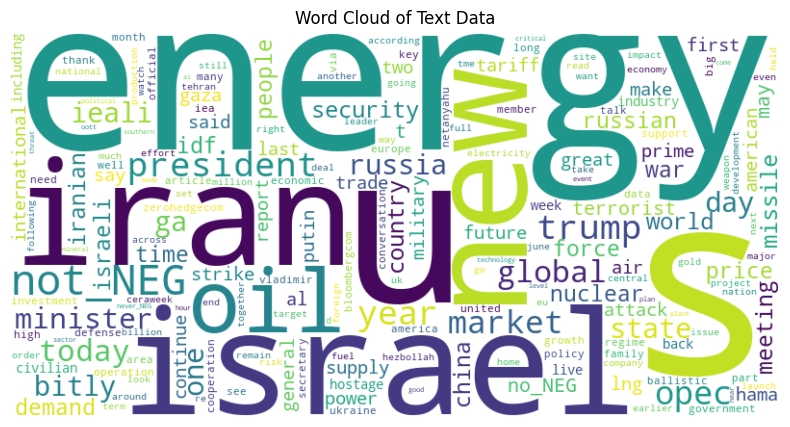

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into a single string
text_data = ' '.join(df['Tweet_processed'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Text Data')
plt.axis('off')
plt.show()